For this assignment, use the population.csv file. This file is in the Files section of the course portal. This file contains information about individuals like their age, marital status,education, etc. and the y variable is the income. The cut off value for the income is $50,000. You will notice that in education columns, there are too many unique type such as 8th grade, 9th grade etc. If you like, you can consolidate these types so that you have a manageable quantity.


Perform the following:

1) Print the names of the columns.

2) Print the number of rows and columns.

3) Change string categorical variables to numbers.

4) Check if there are any NaN values. If yes, replace them with appropriate value or values.

5) Run Logistic Regression, Decision Tree and Random forest and compute accuracy for each model. 

6) Make a conclusion. This is an important step, so make sure you write this.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
pop_df = pd.read_csv('population.csv', header = None)
pop_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
#Assigning a generic name to Columns initially and expected column name will be added when data is reviewed

col_names=['COLUMN_0', 'COLUMN_1', 'COLUMN_2','COLUMN_3','COLUMN_4','COLUMN_5', 'COLUMN_6','COLUMN_7',
          'COLUMN_8', 'COLUMN_9', 'COLUMN_10' ,'COLUMN_11', 'COLUMN_12', 'COLUMN_13', 'COLUMN_14' ]

pop_df = pd.read_csv('population.csv',header=None, names = col_names )

#1) Print the names of the columns
print(pop_df.columns)

Index(['COLUMN_0', 'COLUMN_1', 'COLUMN_2', 'COLUMN_3', 'COLUMN_4', 'COLUMN_5',
       'COLUMN_6', 'COLUMN_7', 'COLUMN_8', 'COLUMN_9', 'COLUMN_10',
       'COLUMN_11', 'COLUMN_12', 'COLUMN_13', 'COLUMN_14'],
      dtype='object')


In [4]:
#2) Print the number of rows and columns
print('Number of rows and columns: ', pop_df.shape)

Number of rows and columns:  (32561, 15)


In [5]:
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   COLUMN_0   32561 non-null  int64 
 1   COLUMN_1   32561 non-null  object
 2   COLUMN_2   32561 non-null  int64 
 3   COLUMN_3   32561 non-null  object
 4   COLUMN_4   32561 non-null  int64 
 5   COLUMN_5   32561 non-null  object
 6   COLUMN_6   32561 non-null  object
 7   COLUMN_7   32561 non-null  object
 8   COLUMN_8   32561 non-null  object
 9   COLUMN_9   32561 non-null  object
 10  COLUMN_10  32561 non-null  int64 
 11  COLUMN_11  32561 non-null  int64 
 12  COLUMN_12  32561 non-null  int64 
 13  COLUMN_13  32561 non-null  object
 14  COLUMN_14  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Data preprocessing and Data Wrangling

In [6]:
pop_df.COLUMN_0.value_counts(ascending=False)

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: COLUMN_0, Length: 73, dtype: int64

In [7]:
#COLUMN_0 seems to be the AGE of the person. So renaming the column name to AGE
pop_df.rename(columns={"COLUMN_0": "Age"}, inplace = True)

In [8]:
pop_df.COLUMN_1.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: COLUMN_1, dtype: int64

In [9]:
#COLUMN_1 denotes the Job sector. So renaming the column name to JOB_SECTOR
pop_df.rename(columns={"COLUMN_1": "Job_Sector"}, inplace = True)

In [10]:
pop_df.Job_Sector.describe()

count        32561
unique           9
top        Private
freq         22696
Name: Job_Sector, dtype: object

In [11]:
#Replacing '?' with top value or mode
pop_df.Job_Sector=pop_df.Job_Sector.str.replace('?',pop_df.Job_Sector.mode()[0].strip())

In [12]:
pop_df.Job_Sector.value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Job_Sector, dtype: int64

In [13]:
pop_df.COLUMN_2.value_counts()

164190    13
203488    13
123011    13
113364    12
121124    12
          ..
284211     1
312881     1
177711     1
179758     1
229376     1
Name: COLUMN_2, Length: 21648, dtype: int64

In [14]:
pop_df.COLUMN_3.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: COLUMN_3, dtype: int64

In [15]:
#COLUMN_3 denotes Education details of the person. So renaming the column name to EDUCATION
pop_df.rename(columns={"COLUMN_3": "Education"}, inplace = True)

In [16]:
pop_df.COLUMN_4.value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: COLUMN_4, dtype: int64

In [17]:
#COLUMN_4 may denotes level of Education of the person. So renaming the column name to Education_Level
pop_df.rename(columns={"COLUMN_4": "Education_Level"}, inplace = True)

In [18]:
pop_df.COLUMN_5.value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: COLUMN_5, dtype: int64

In [19]:
#COLUMN_5 may denotes Maristal status of the person. So renaming the column name to MARITAL_STATUS
pop_df.rename(columns={"COLUMN_5": "Marital_Status"}, inplace = True)

In [20]:
pop_df.COLUMN_6.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: COLUMN_6, dtype: int64

In [21]:
#COLUMN_6  denotes Job Type of the person. So renaming the column name to JOB_TYPE
pop_df.rename(columns={"COLUMN_6": "Job_Type"}, inplace = True)

In [22]:
#Replacing '?' with mode
pop_df.Job_Type = pop_df.Job_Type.str.replace('?',pop_df.Job_Type.mode()[0].strip())

In [23]:
pop_df.Job_Type.value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Job_Type, dtype: int64

In [24]:
pop_df.COLUMN_7.value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: COLUMN_7, dtype: int64

In [25]:
#COLUMN_7  denotes Family status of the person. So renaming the column name to Relationship
pop_df.rename(columns={"COLUMN_7": "Relationship"}, inplace = True)

In [26]:
pop_df.COLUMN_8.value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: COLUMN_8, dtype: int64

In [27]:
#COLUMN_8 denotes race of the person. So renaming the column name to RACE
pop_df.rename(columns={"COLUMN_8": "Race"}, inplace = True)

In [28]:
pop_df.COLUMN_9.value_counts()

 Male      21790
 Female    10771
Name: COLUMN_9, dtype: int64

In [29]:
#COLUMN_9 denotes Gender of the person. So renaming the column name to Gender
pop_df.rename(columns={"COLUMN_9": "Gender"}, inplace = True)

In [30]:
pop_df.COLUMN_10.value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: COLUMN_10, Length: 119, dtype: int64

In [31]:
pop_df.COLUMN_11.value_counts()

0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: COLUMN_11, Length: 92, dtype: int64

In [32]:
pop_df.COLUMN_12.value_counts()

40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
92        1
94        1
87        1
74        1
82        1
Name: COLUMN_12, Length: 94, dtype: int64

In [33]:
pop_df.COLUMN_13.value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [34]:
#COLUMN_13 denotes Country of the person. So renaming the column name to Country
pop_df.rename(columns={"COLUMN_13": "Country"}, inplace = True)

In [35]:
#Replacing '?' with mode
pop_df.Country = pop_df.Country.str.replace('?',pop_df.Country.mode()[0].strip())

In [36]:
pop_df.COLUMN_14.value_counts()

 <=50K    24720
 >50K      7841
Name: COLUMN_14, dtype: int64

In [37]:
pop_df.COLUMN_10.value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: COLUMN_10, Length: 119, dtype: int64

In [38]:
pop_df.COLUMN_11.value_counts()

0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: COLUMN_11, Length: 92, dtype: int64

In [39]:
pop_df.COLUMN_12.value_counts()

40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
92        1
94        1
87        1
74        1
82        1
Name: COLUMN_12, Length: 94, dtype: int64

In [40]:
#COLUMN_14 denotes Income category of the person. So renaming the column name to Income_Category
pop_df.rename(columns={"COLUMN_14": "Income_Category"}, inplace = True)

In [41]:
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              32561 non-null  int64 
 1   Job_Sector       32561 non-null  object
 2   COLUMN_2         32561 non-null  int64 
 3   Education        32561 non-null  object
 4   Education_Level  32561 non-null  int64 
 5   Marital_Status   32561 non-null  object
 6   Job_Type         32561 non-null  object
 7   Relationship     32561 non-null  object
 8   Race             32561 non-null  object
 9   Gender           32561 non-null  object
 10  COLUMN_10        32561 non-null  int64 
 11  COLUMN_11        32561 non-null  int64 
 12  COLUMN_12        32561 non-null  int64 
 13  Country          32561 non-null  object
 14  Income_Category  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [42]:
#4) Check if there are any NaN values. If yes, replace them with appropriate value or values.
pop_df.isna().sum()

Age                0
Job_Sector         0
COLUMN_2           0
Education          0
Education_Level    0
Marital_Status     0
Job_Type           0
Relationship       0
Race               0
Gender             0
COLUMN_10          0
COLUMN_11          0
COLUMN_12          0
Country            0
Income_Category    0
dtype: int64

In [43]:
#1) Print the names of the columns.
pop_df.columns

Index(['Age', 'Job_Sector', 'COLUMN_2', 'Education', 'Education_Level',
       'Marital_Status', 'Job_Type', 'Relationship', 'Race', 'Gender',
       'COLUMN_10', 'COLUMN_11', 'COLUMN_12', 'Country', 'Income_Category'],
      dtype='object')

#### Data Visualization

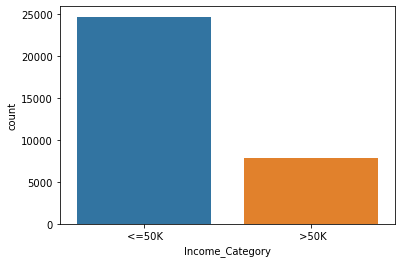

In [44]:
#plot target variable

sns.countplot(pop_df.Income_Category)
plt.show()

Majority of this population data set has less income or Income less 50K

<AxesSubplot:xlabel='Education', ylabel='count'>

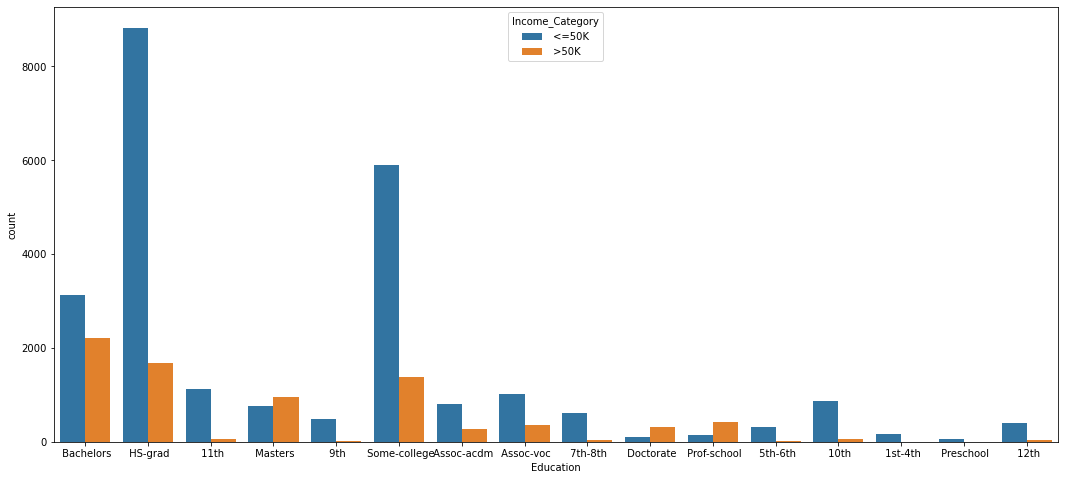

In [45]:
ax_dim = (18, 8)
fig, ax = plt.subplots(figsize=ax_dim)
sns.countplot(ax=ax,data=pop_df, x='Education', hue='Income_Category')

Majority of the population of this dataset has a Bachelors Degreee or Some College Experience. 
People who are having Doctorates or went Profession school are likely to get higher income

<AxesSubplot:xlabel='Education_Level', ylabel='count'>

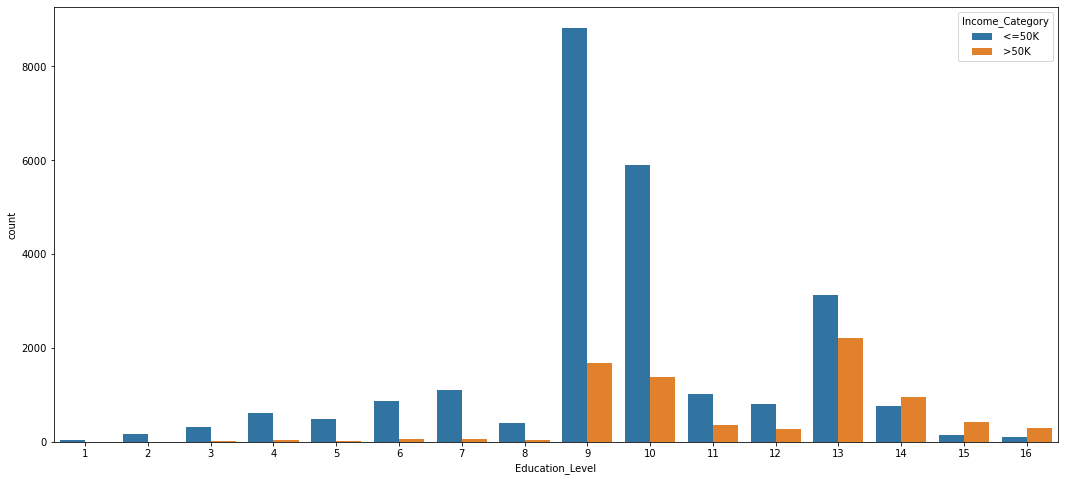

In [46]:
ax_dim = (18, 8)
fig, ax = plt.subplots(figsize=ax_dim)
sns.countplot(ax=ax,data=pop_df, x='Education_Level', hue='Income_Category')

Majority of the population of this dataset has an Education_Level of 9 or 10
People who are having higher Education_Level are more likely to get higher income

<AxesSubplot:xlabel='Job_Sector', ylabel='count'>

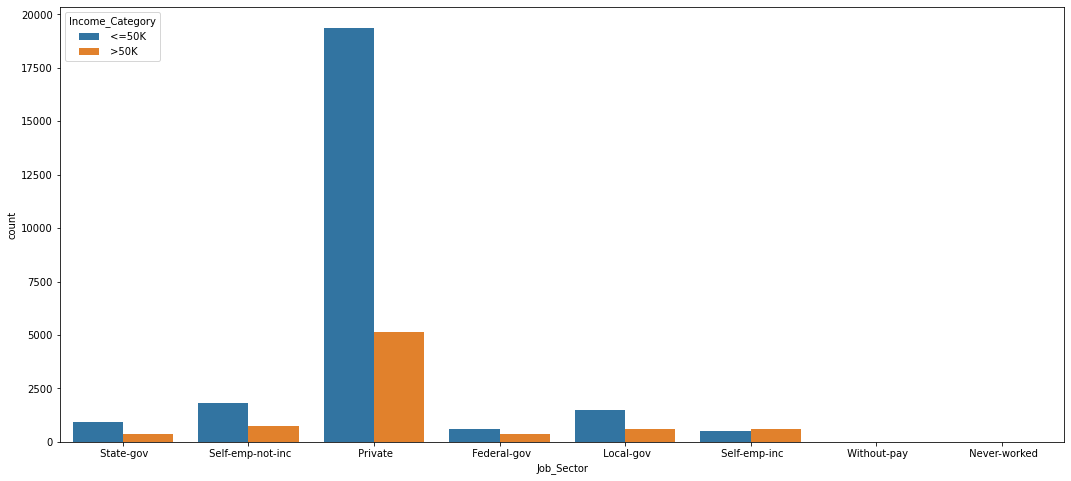

In [47]:
ax_dim = (18, 8)
fig, ax = plt.subplots(figsize=ax_dim)
sns.countplot(ax=ax,data=pop_df, x='Job_Sector', hue='Income_Category')

Majority of the population works in Private sector in this dataset. Around 25% of that population has higher income
compared to rest. 

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

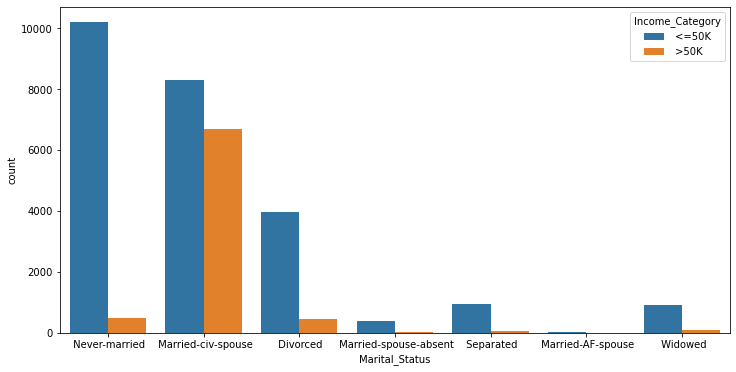

In [48]:
ax_dim = (12, 6)
fig, ax = plt.subplots(figsize=ax_dim)
sns.countplot(ax=ax,data=pop_df, x='Marital_Status', hue='Income_Category')

People who are married and having a spouse has higher income comepared to rest of the population

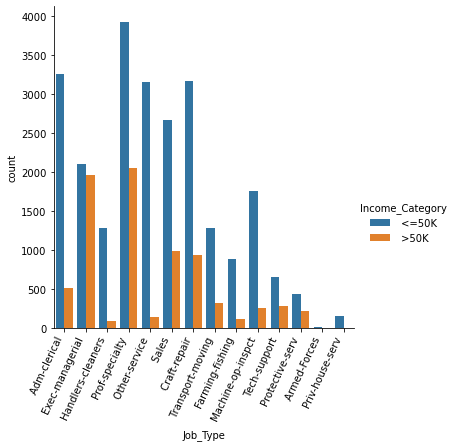

In [49]:
ax_dim = (20, 9)
chart = sns.catplot(ax=ax, data=pop_df, x='Job_Type', kind='count', hue='Income_Category')
chart.set_xticklabels(rotation=65, horizontalalignment='right')


People who are working as Managerial Excetives or as Professionals in Speciality field has high income 
compared to rest of the population

<AxesSubplot:xlabel='Relationship', ylabel='count'>

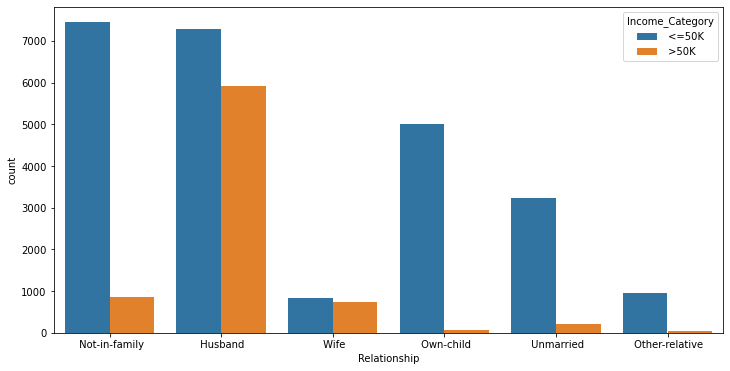

In [50]:
ax_dim = (12, 6)
fig, ax = plt.subplots(figsize=ax_dim)
sns.countplot(ax=ax,data=pop_df, x='Relationship', hue='Income_Category')

People who are in a relationship has higher income compared to others.

<AxesSubplot:xlabel='Race', ylabel='count'>

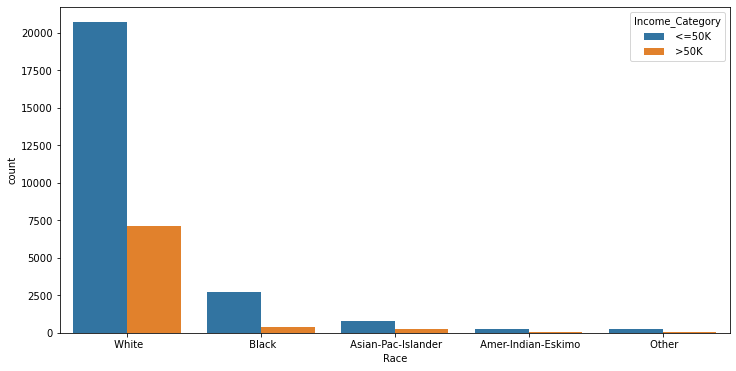

In [51]:
ax_dim = (12, 6)
fig, ax = plt.subplots(figsize=ax_dim)
sns.countplot(ax=ax,data=pop_df, x='Race', hue='Income_Category')

People of White race are highly employed compared to any other race in this dataset. A very less number of people of non white races get higher income in this dataset

<AxesSubplot:xlabel='Gender', ylabel='count'>

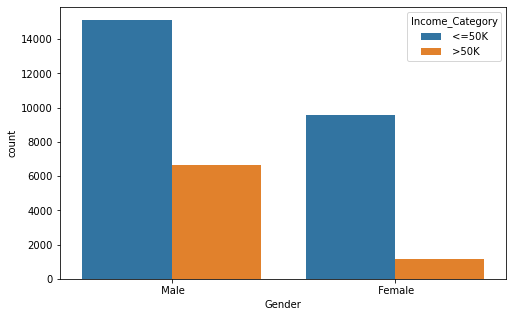

In [52]:
ax_dim = (8, 5)
fig, ax = plt.subplots(figsize=ax_dim)
sns.countplot(ax=ax,data=pop_df, x='Gender', hue='Income_Category')



Male popluation has higer income compared to Female population. Females with higher income are very less compared to male population

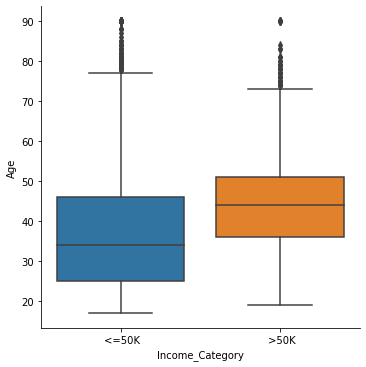

In [53]:
sns.catplot(x="Income_Category", y="Age", kind="box", data=pop_df)

Higher income group has a higher average age compared to lower income group

#### Change Categorical Variables to Numeric values

In [54]:
pop_df.describe(exclude=np.number)

,Job_Sector,Education,Marital_Status,Job_Type,Relationship,Race,Gender,Country,Income_Category
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,24532,10501,14976,5983,13193,27816,21790,29753,24720


In [55]:
pop_df.Gender.value_counts()

 Male      21790
 Female    10771
Name: Gender, dtype: int64

In [56]:
gender = { ' Male': 1, ' Female': 0}
pop_df.Gender = [gender[item] for item in pop_df.Gender ]

In [57]:
pop_df.Gender.value_counts()

1    21790
0    10771
Name: Gender, dtype: int64

In [58]:
pop_df.Income_Category.value_counts()

 <=50K    24720
 >50K      7841
Name: Income_Category, dtype: int64

In [59]:
income_cat = {' <=50K': 0, ' >50K': 1}
pop_df.Income_Category = [income_cat[item] for item in pop_df.Income_Category]

In [60]:
pop_df.Income_Category.value_counts()

0    24720
1     7841
Name: Income_Category, dtype: int64

In [61]:
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder()

In [62]:
for i, l in enumerate(labelencoder.fit(pop_df['Job_Sector']).classes_):
    print(i,":",l)

0 :  Federal-gov
1 :  Local-gov
2 :  Never-worked
3 :  Private
4 :  Self-emp-inc
5 :  Self-emp-not-inc
6 :  State-gov
7 :  Without-pay


In [63]:
pop_df.Job_Sector = labelencoder.fit_transform(pop_df.Job_Sector)

In [64]:
for i, l in enumerate(labelencoder.fit(pop_df.Education).classes_):
    print(i,":",l)

0 :  10th
1 :  11th
2 :  12th
3 :  1st-4th
4 :  5th-6th
5 :  7th-8th
6 :  9th
7 :  Assoc-acdm
8 :  Assoc-voc
9 :  Bachelors
10 :  Doctorate
11 :  HS-grad
12 :  Masters
13 :  Preschool
14 :  Prof-school
15 :  Some-college


In [65]:
pop_df.Education = labelencoder.fit_transform(pop_df.Education)

In [66]:
for i, l in enumerate(labelencoder.fit(pop_df.Marital_Status).classes_):
    print(i,":",l)

0 :  Divorced
1 :  Married-AF-spouse
2 :  Married-civ-spouse
3 :  Married-spouse-absent
4 :  Never-married
5 :  Separated
6 :  Widowed


In [67]:
pop_df.Marital_Status = labelencoder.fit_transform(pop_df.Marital_Status)

In [68]:
for i, l in enumerate(labelencoder.fit(pop_df.Job_Type).classes_):
    print(i,":",l)

0 :  Adm-clerical
1 :  Armed-Forces
2 :  Craft-repair
3 :  Exec-managerial
4 :  Farming-fishing
5 :  Handlers-cleaners
6 :  Machine-op-inspct
7 :  Other-service
8 :  Priv-house-serv
9 :  Prof-specialty
10 :  Protective-serv
11 :  Sales
12 :  Tech-support
13 :  Transport-moving


In [69]:
pop_df.Job_Type = labelencoder.fit_transform(pop_df.Job_Type)

In [70]:
for i, l in enumerate(labelencoder.fit(pop_df.Relationship).classes_):
    print(i,":",l)

0 :  Husband
1 :  Not-in-family
2 :  Other-relative
3 :  Own-child
4 :  Unmarried
5 :  Wife


In [71]:
pop_df.Relationship = labelencoder.fit_transform(pop_df.Relationship)

In [72]:
for i, l in enumerate(labelencoder.fit(pop_df.Race).classes_):
    print(i,":",l)

0 :  Amer-Indian-Eskimo
1 :  Asian-Pac-Islander
2 :  Black
3 :  Other
4 :  White


In [73]:
pop_df.Race = labelencoder.fit_transform(pop_df.Race)

In [74]:
for i, l in enumerate(labelencoder.fit(pop_df.Country).classes_):
    print(i,":",l)

0 :  Cambodia
1 :  Canada
2 :  China
3 :  Columbia
4 :  Cuba
5 :  Dominican-Republic
6 :  Ecuador
7 :  El-Salvador
8 :  England
9 :  France
10 :  Germany
11 :  Greece
12 :  Guatemala
13 :  Haiti
14 :  Holand-Netherlands
15 :  Honduras
16 :  Hong
17 :  Hungary
18 :  India
19 :  Iran
20 :  Ireland
21 :  Italy
22 :  Jamaica
23 :  Japan
24 :  Laos
25 :  Mexico
26 :  Nicaragua
27 :  Outlying-US(Guam-USVI-etc)
28 :  Peru
29 :  Philippines
30 :  Poland
31 :  Portugal
32 :  Puerto-Rico
33 :  Scotland
34 :  South
35 :  Taiwan
36 :  Thailand
37 :  Trinadad&Tobago
38 :  United-States
39 :  Vietnam
40 :  Yugoslavia


In [75]:
pop_df.Country = labelencoder.fit_transform(pop_df.Country)

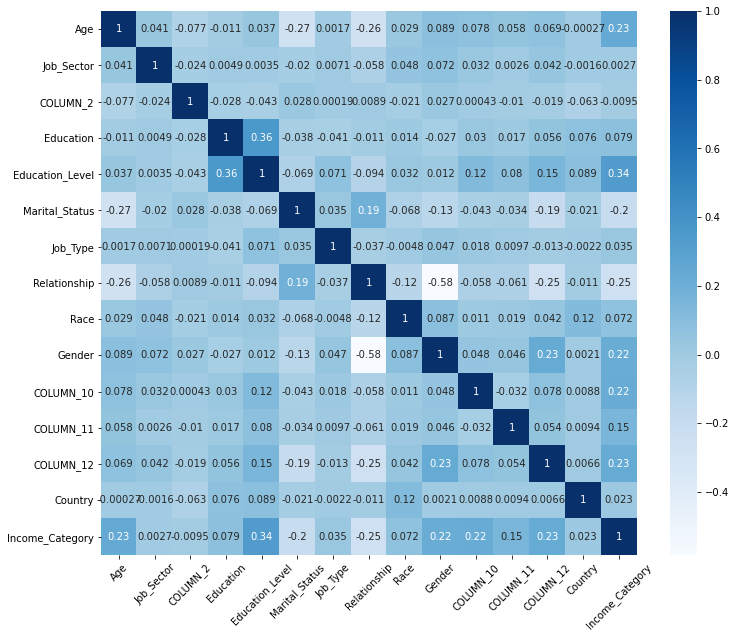

In [76]:
#Plot Correlation Matrix

fig = plt.figure(figsize=(12, 10))
sns.heatmap(pop_df.corr(), cmap='Blues', annot=True)
plt.xticks(rotation=45)
plt.show()

In [77]:
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              32561 non-null  int64
 1   Job_Sector       32561 non-null  int64
 2   COLUMN_2         32561 non-null  int64
 3   Education        32561 non-null  int64
 4   Education_Level  32561 non-null  int64
 5   Marital_Status   32561 non-null  int64
 6   Job_Type         32561 non-null  int64
 7   Relationship     32561 non-null  int64
 8   Race             32561 non-null  int64
 9   Gender           32561 non-null  int64
 10  COLUMN_10        32561 non-null  int64
 11  COLUMN_11        32561 non-null  int64
 12  COLUMN_12        32561 non-null  int64
 13  Country          32561 non-null  int64
 14  Income_Category  32561 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


In [78]:
features = ['Age', 'Job_Sector','Education_Level', 'Marital_Status','Job_Type', 'Relationship', 'Gender', 'Race', 
            'Country', 'COLUMN_10', 'COLUMN_11', 'COLUMN_12',  'COLUMN_2']

X = pop_df[features]
y = pop_df['Income_Category']

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, accuracy_score

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [80]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [81]:
models = []

lr = LogisticRegression(penalty='l2', C=1, solver='lbfgs')
dtree = DecisionTreeClassifier(criterion= 'gini', min_samples_split=8,
                                  min_samples_leaf = 4, max_features = 'auto')
rfc = RandomForestClassifier(n_estimators=400)

models.extend([lr,dtree, rfc])

for model in models:
    print(model)
    model.fit(x_train, y_train)
    ypred = model.predict(x_test)
    print("accuracy_score: %0.2f" %(accuracy_score(y_test, ypred)))
    print()
    print('Confusion Matrix')
    print(confusion_matrix(y_test, ypred))
    print()
    print("roc_auc_score: %0.2f" %(roc_auc_score(y_test, ypred)))
    print()
    print('Classification Report')
    print(classification_report(y_test,ypred))
    print('*******************************************')

LogisticRegression(C=1)
accuracy_score: 0.83

Confusion Matrix
[[4651  291]
 [ 844  727]]

roc_auc_score: 0.70

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4942
           1       0.71      0.46      0.56      1571

    accuracy                           0.83      6513
   macro avg       0.78      0.70      0.73      6513
weighted avg       0.81      0.83      0.81      6513

*******************************************
DecisionTreeClassifier(max_features='auto', min_samples_leaf=4,
                       min_samples_split=8)
accuracy_score: 0.84

Confusion Matrix
[[4515  427]
 [ 614  957]]

roc_auc_score: 0.76

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      4942
           1       0.69      0.61      0.65      1571

    accuracy                           0.84      6513
   macro avg       0.79      0.76      0.77      6513
weigh

In [82]:
def plot_predicated_actual_distribution(model, x, y):
    '''
    Plot Actual Vs Predicated data distribution 
    '''
    y_pred = model.predict(x)
    figure, axes = plt.subplots(ncols=2)
    figure.set_size_inches(10, 4)
    sns.countplot(y, ax=axes[0])
    axes[0].set_title('Actual Data Distribution')
    sns.countplot(y_pred, ax=axes[1])
    axes[1].set_title('Predicted Data Distribution')
    
    print('Y')
    print(y[0:5])
    print('Y_PRED')
    print(y_pred[0:5])
    

Y
14160    0
27048    0
28868    1
5667     0
7827     0
Name: Income_Category, dtype: int64
Y_PRED
[0 0 1 0 0]


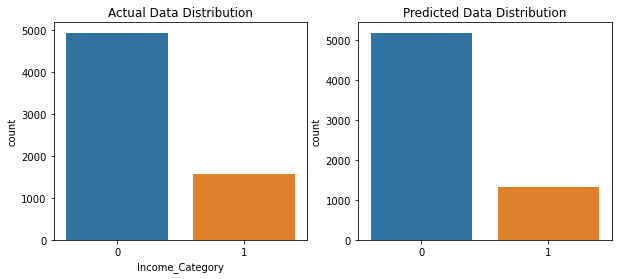

In [83]:
plot_predicated_actual_distribution(rfc, x_test, y_test)

#### Conclusion


Population dataset has 15 columns namely Age, Job_sector, Job_type, Education, Education_level, Marital_Status, 
Relationship, Gender, Race, Country, Income_Catergory and 4 unknown columns. 

Education and Education_Level seem to have the same data.So I have used only Education_Level in the model

Based on the data analysis and data correlation matrix, Age, Education, Relationship, Marital_Status and the 4 unknown columns are major factors in determining the Income Category.

For Logistic Regression model, 
    accuracy score = 0.83
    roc_auc_score = 0.70
    
For Decision Tree Classification model, 
    accuracy score = 0.85
    roc_auc_score = 0.75
    
For Random Forest Classification model, 
    accuracy score = 0.86
    roc_auc_score = 0.79

Random Forest or Decision Tree seems to be the ideal model for this dataset